In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
dfc = df.copy()

# TASK 1

## Data Processing

In [4]:
dfc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [5]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Pengamatan:
count > Rows (Missing value)
  - Children
  - City
  - agent
  - company

## Handling Missing values

In [6]:
dfc.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
# fill missing value

# Null values in 'agent' and 'company' indicates the booking did not came from a travel agent. I will replace it with 0, which means 'Not applicable'. 
dfc['company'] = dfc['company'].fillna(0)
dfc['agent'] = dfc['agent'].fillna(0)
# Null values in 'city' column can be seen as Unknown city
dfc['city'] = dfc['city'].fillna('unknown')
# null values in children could mean 0 children, so i'll impute the missing value with 0
dfc['children'] = dfc['children'].fillna(0)

In [8]:
dfc.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Distribution Data

In [10]:
# Pick Separte columns
category = dfc.select_dtypes(include='object')
numerical = dfc.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numeric: ", numerical_cols)
print("Data category: ", category_cols)

Data numeric:  ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Data category:  ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']


In [11]:
dfc[numerical_cols].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
dfc[category_cols].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


### Fix Incorrect Data Values

In [13]:
pd.unique(dfc['meal'])

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

Terdapat nilai Undefined pada kolom meal yang mana sama saja seperti nilai No Meal sehingga bisa diganti nilainya dengan nilai No Meal

In [14]:
len(dfc[dfc['meal'] == 'Undefined'])

1169

In [15]:
# drop nilai "undefined" ganti dengan No Meal pada kolom meal
dfc["meal"].replace("Undefined", "No Meal", inplace=True)

In [16]:
pd.unique(dfc['meal'])

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [17]:
dfc.shape

(119390, 29)

## Identifying unrelated data

In [18]:
dfc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out


In [19]:
df2c = dfc[(dfc['adults'] == 0) & (dfc['children'] == 0) & (dfc['babies'] == 0)]

In [20]:
df2c

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,0.0,174.0,0,Family,0.00,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,0.0,174.0,0,Personal,0.00,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0.0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0.0,0,Family,0.00,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out
4127,Resort Hotel,1,0,2018,April,8,15,0,0,0,0.0,0,No Meal,unknown,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0.0,383.0,0,Personal,0.00,0,0,Canceled
9376,Resort Hotel,1,0,2018,January,48,21,0,0,0,0.0,0,No Meal,unknown,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0.0,386.0,0,Bussiness,0.00,0,0,Canceled
31765,Resort Hotel,0,31,2018,February,53,27,2,8,0,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,28.00,1,0,Check-Out
32029,Resort Hotel,0,4,2019,March,2,14,0,1,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,168.0,0.0,0,Family,0.00,0,0,Check-Out
32827,Resort Hotel,0,46,2019,March,4,25,3,9,0,0.0,0,No Meal,Kota Yogyakarta,Direct,Direct,0,0,0,8,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out


Observation

There is a value of 0 for the adults, children, and babies columns

In [21]:
# drop rows that have a value of 0 on the adults, children, and babies columns
dfc.drop(dfc[(dfc['adults'] == 0) & (dfc['children'] == 0) & (dfc['babies'] == 0)].index, inplace=True)

In [22]:
#create column for guest
dfc['guest'] = dfc['adults']+dfc['children']+dfc['babies']
dfc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


# Task 2

## Monthly Hotel Booking Analysis Based on Hotel Type

In [23]:
df3 = dfc.copy()

## Comparison of the number of bookings for each type of hotel every month

In [24]:
dfc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [25]:
df3_group_total_booking = df3.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year': ['nunique'],
                                                                            'guest':['count']}).reset_index()
df3_group_total_booking.columns = ['hotel type', 'arrival_month', 'arrival_year', 'total_booking']
df3_group_total_booking

,hotel type,arrival_month,arrival_year,total_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


Observation:
Pada bulan September dan Oktober data diambil dari 3 tahun kebelakang sisanya diambil dari 2 tahun kebelakang dan kita membutuhkan normalisasi dengan mencari rata-rata booking hotel

In [26]:
df3_group_total_booking['average_booking'] = round(df3_group_total_booking['total_booking']/df3_group_total_booking['arrival_year'])
df3_group_total_booking

,hotel type,arrival_month,arrival_year,total_booking,average_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


In [27]:
#Urut berdasarkan nama
list_name_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']
df3_group_total_booking['arrival_month'] = pd.Categorical(df3_group_total_booking['arrival_month'], categories=list_name_of_months, ordered=True)
df3_group_total_booking = df3_group_total_booking.sort_values(by=['hotel type', 'arrival_month'])
df3_group_total_booking

,hotel type,arrival_month,arrival_year,total_booking,average_booking
4,City Hotel,January,2,4336,2168.0
3,City Hotel,February,2,4114,2057.0
7,City Hotel,March,2,3730,1865.0
0,City Hotel,April,2,4950,2475.0
8,City Hotel,May,2,6434,3217.0
6,City Hotel,June,2,7469,3734.0
5,City Hotel,July,2,8221,4110.0
1,City Hotel,August,2,7885,3942.0
11,City Hotel,September,3,8071,2690.0
10,City Hotel,October,3,8967,2989.0


Text(-0.5, 4900, 'Both types of hotels experienced a decrease in hotel bookings from august to september')

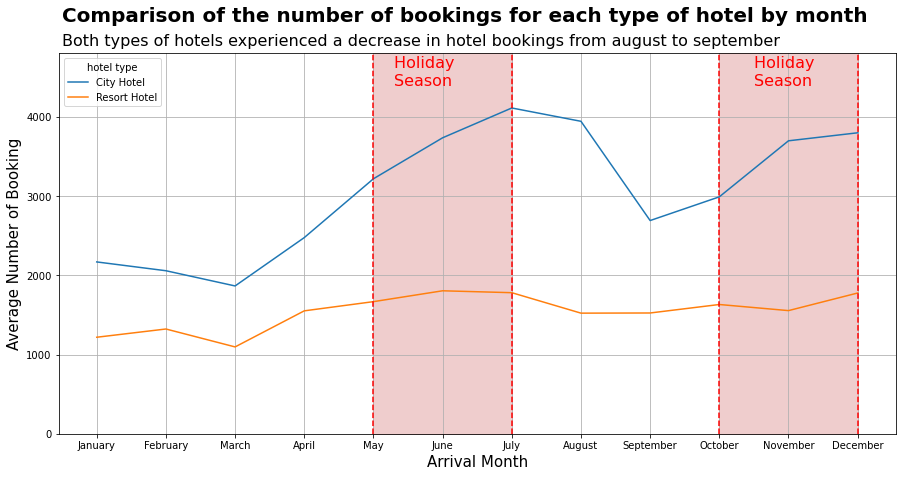

In [28]:
# plot 

plt.figure(figsize=(15,7)) # mengatur ukuran figure
sns.lineplot(x='arrival_month', y='average_booking', hue='hotel type', data=df3_group_total_booking)
plt.grid()

plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15) 
plt.ylim(0, 4800) # membatasi sumbu y

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.3, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=5200, s="Comparison of the number of bookings for each type of hotel by month", 
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=4900, s="Both types of hotels experienced a decrease in hotel bookings from august to september", 
         fontsize=16)

### Insight
Dari grafik diatas dapat kita lihat bahwa pada tipe City Hotel dan Resort Hotel mengalami peningkatan jumlah pemesanan pada bulan Juni dan Juli hal tersebut bertepatan pada libur anak sekolah. Ketika memasuki bulan Agustus dan September pada City Hotel mengalami penurunan yang signifikan dikarenakan tidak ada hari libur atau hari besar lainnya. Dan saat memasuki bulan Oktober dan Desember mengalami peningkatan sama seperti bulan Juni dan Juli, peningkatan tersebut dapat kita lihat terutama pada City Hotel, mungkin pada bulan-bulan tersebut memasuki masa liburan seperti Natal dan Tahun Baru

# TASK 3

## Impact Analysis of Stay Duration on Hotel Bookings Cancel

In [29]:
df4 = df3.copy()

In [30]:
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [31]:
# buat tabel baru untuk total durasi 
df4['total_duration'] = df4['stays_in_weekdays_nights'] + df4['stays_in_weekend_nights']
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2


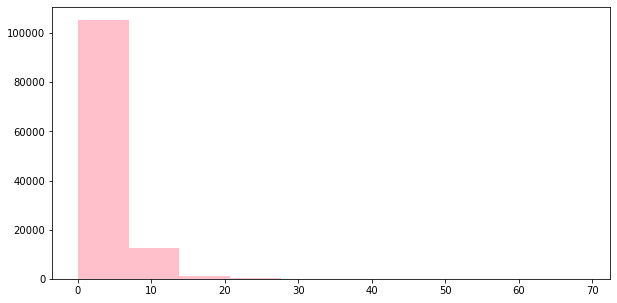

In [32]:
# bar chart
plt.figure(figsize=(10,5))
plt.hist(data = df4, x='total_duration', color = 'pink')
plt.show()

Data diatas skew positif atau skew ke kanan yang berarti orang menginap lebih dari 14 hari itu memiliki jumlah yang sedikit sehingga dapat kita kelompokkan untuk orang yang menginap lebih dari 14 dapat kelompokkan menjadi 15 hari

In [33]:
df4['total_night_group'] = np.where(df4['total_duration'] > 14, 15,df4['total_duration'])
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_duration,total_night_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2


In [34]:
# Aggregat tabel 
df4_group = df4.groupby(['hotel', 'is_canceled', 'total_night_group']).agg({'arrival_date_month': ['count']}).reset_index()
df4_group.columns = ['hotel_type', 'cancel', 'total_night', 'total_booking']
df4_group.head(10)

,hotel_type,cancel,total_night,total_booking
0,City Hotel,0,0,251
1,City Hotel,0,1,9155
2,City Hotel,0,2,10983
3,City Hotel,0,3,11889
4,City Hotel,0,4,7694
5,City Hotel,0,5,3210
6,City Hotel,0,6,1111
7,City Hotel,0,7,1245
8,City Hotel,0,8,205
9,City Hotel,0,9,119


In [35]:
df4_pivot = df4_group.pivot_table(index=['hotel_type', 'total_night'], columns='cancel', values='total_booking').reset_index()
df4_pivot.head(5)

cancel,hotel_type,total_night,0,1
0,City Hotel,0,251,13
1,City Hotel,1,9155,4103
2,City Hotel,2,10983,10432
3,City Hotel,3,11889,9482
4,City Hotel,4,7694,4853


In [36]:
df4_pivot['percentage_cancel'] = round((df4_pivot[1]/(df4_pivot[0]+df4_pivot[1]))*100,2)
df4_pivot.head(5)

cancel,hotel_type,total_night,0,1,percentage_cancel
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68


In [37]:
df4_pivot = df4_pivot[df4_pivot['total_night'] > 0]

Text(0, 102, "the percentage of 'city hotel' hotel types that have an increasing trend of canceled bookings based on length of stay")

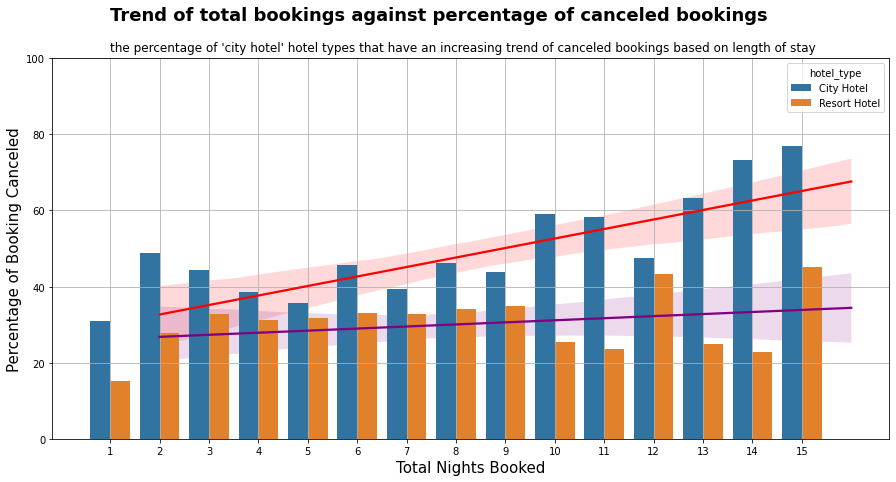

In [38]:
plt.figure(figsize=(15,7)) # mengatur ukuran figure
sns.barplot(x='total_night', y='percentage_cancel', hue='hotel_type', data=df4_pivot)
sns.regplot(x='total_night', y='percentage_cancel', data=df4_pivot[df4_pivot['hotel_type'] == 'City Hotel'], scatter=False, label='Trend City Hotel', color = 'red')
sns.regplot(x='total_night', y='percentage_cancel', data=df4_pivot[df4_pivot['hotel_type'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', color = 'purple')
plt.grid()

plt.xlabel('Total Nights Booked', fontsize=15)
plt.ylabel('Percentage of Booking Canceled', fontsize=15) 
plt.ylim(0, 100) # membatasi sumbu y

plt.text(x=0, y=110, s="Trend of total bookings against percentage of canceled bookings", 
         fontsize=18, fontweight='bold') # memberikan judul yang informatif
plt.text(x=0, y=102, s="the percentage of 'city hotel' hotel types that have an increasing trend of canceled bookings based on length of stay", 
         fontsize=12) # memberikan keterangan tambahan atas judul

### Insight:
Grafik diatas dapat kita lihat bagaimana durasi menginap dapat mempengaruhi tingkat pembatan hotel. Kedua jenis hotel tersebut memiliki trend positif yang berarti semakin lama durasi menginap maka semakin tinggi juga kemungingkinan pemesanan tersebut akan dibatalkan. dari grafik tersebut kita juga dapat melihat bahwa hotel dengan City Hotel memiliki trend positif untuk pemesanan yang akan di batlkan.

# TASK 4

## Impact Analysis of Lead Time on Booking Cancelation Rates

In [39]:
df5 = df4.copy()

In [40]:
df5.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_duration,total_night_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2


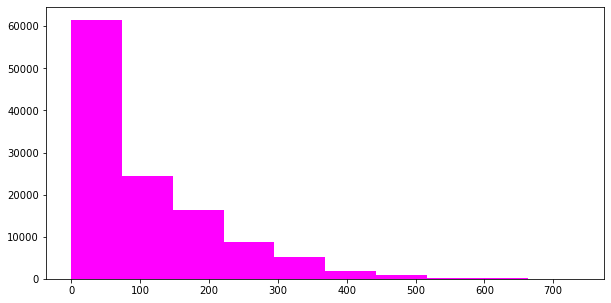

In [41]:
# plot figure lead time
plt.figure(figsize=(10,5))
plt.hist(data = df5, x='lead_time', color = 'magenta')
plt.show()

Dari grafik diatas bahwa distribusi data lead time memiliki distribusi positif atau dapat kita katakan skew ke arah ke kanan dimana lead time dengan nilai lebih dari 400 mempunyai frekuensi yang sedikit sehingga untuk nilai yang lebih dari 400 ini akan kita kelompokkan menjadi 401

In [47]:
df5['lead_times'] = np.where(df5['lead_time'] > 400, 401, df5['lead_time'])

bins = list(np.arange(0,max(df5['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df5['lead_time_group'] = pd.cut(df5['lead_times'],bins=bins, include_lowest=True, labels=labels) # membuat groupping lead time untuk setiap kelipatan 30

In [48]:
# tabel aggregat melihat perbandingan jumlah pemesan hotel yang dibatalkan terhadap jarak waktu pemesanan pada Kedua Jenis hotel

df5_group = df5.groupby(['hotel', 'is_canceled', 'lead_time_group']).agg({'arrival_date_month': ['count']}).reset_index()
df5_group.columns = ['hotel_type', 'is_canceled', 'lead_time_group', 'total_booking']
df5_group

,hotel_type,is_canceled,lead_time_group,total_booking
0,City Hotel,0,0-30,18060
1,City Hotel,0,30-60,7266
2,City Hotel,0,60-90,5210
3,City Hotel,0,90-120,3956
4,City Hotel,0,120-150,3064
5,City Hotel,0,150-180,2442
6,City Hotel,0,180-210,1800
7,City Hotel,0,210-240,1224
8,City Hotel,0,240-270,880
9,City Hotel,0,270-300,660


In [49]:
df5_pivot = df5_group.pivot_table(index=['hotel_type', 'lead_time_group'], columns='is_canceled', values='total_booking').reset_index()
df5_pivot

is_canceled,hotel_type,lead_time_group,0,1
0,City Hotel,0-30,18060,5184
1,City Hotel,30-60,7266,4608
2,City Hotel,60-90,5210,3692
3,City Hotel,90-120,3956,3486
4,City Hotel,120-150,3064,2542
5,City Hotel,150-180,2442,2716
6,City Hotel,180-210,1800,1793
7,City Hotel,210-240,1224,1280
8,City Hotel,240-270,880,1237
9,City Hotel,270-300,660,1859


In [50]:
df5_pivot['percentage_cancel'] = round((df5_pivot[1]/(df5_pivot[0]+df5_pivot[1]))*100,2)
df5_pivot

is_canceled,hotel_type,lead_time_group,0,1,percentage_cancel
0,City Hotel,0-30,18060,5184,22.30
1,City Hotel,30-60,7266,4608,38.81
2,City Hotel,60-90,5210,3692,41.47
3,City Hotel,90-120,3956,3486,46.84
4,City Hotel,120-150,3064,2542,45.34
5,City Hotel,150-180,2442,2716,52.66
6,City Hotel,180-210,1800,1793,49.90
7,City Hotel,210-240,1224,1280,51.12
8,City Hotel,240-270,880,1237,58.43
9,City Hotel,270-300,660,1859,73.80


Text(-0.5, 102, 'Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year')

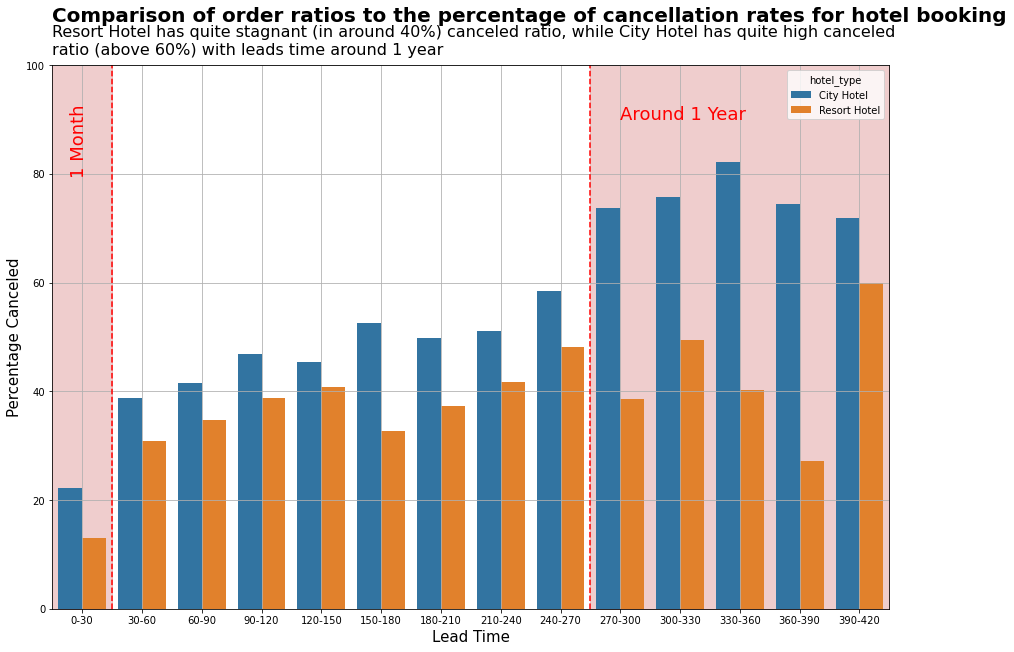

In [52]:
# membuat figure rasio pembatalan terhadap jarak waktu
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_group', y='percentage_cancel', hue='hotel_type', data=df5_pivot)
plt.grid()

plt.xlabel('Lead Time', fontsize=15)
plt.ylabel('Percentage Canceled', fontsize=15) 
plt.ylim(0, 100) # membatasi sumbu y
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(8.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9, y=90, s='Around 1 Year', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=108, s="Comparison of order ratios to the percentage of cancellation rates for hotel booking", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year", 
         fontsize=16) # memberikan keterangan tambahan atas judul

### insight:
Insight ini berfokuskan pda lamanya waktu tunggu terhadap pembatalan pemesanan hoel
Dapat kita lihat dari grafik diatas bahwa tingkat pembatalan pesanan paling rendah terdapat pada pemesanan dengan waktu tunggu kurang dari 30 hari dan berlaku untuk kedua jenis hotel. Resort Hotel memiliki nilai yang cukup stagnan yaitu 40% rasio pembatalan, sedangkan City Hotel memiliki rasio yang cukup tinggi yaitu 60% untuk waktu tunggu sekitar 1 tahun.